In [ ]:
#Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print(f"PyTorch version: {torch.__version__}\n torchvision version :{torch.__version__}")


PyTorch version: 2.1.0+cu118
 torchvision version :2.1.0+cu118


#1. Get dadaset:
https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html

In [ ]:
# setup training data
train_data=datasets.MNIST(
    root="data",
    train= True, # we get train set only
    download=True, #download if it does not exist
    transform= ToTensor(),
    target_transform=None)

# setup test data
test_data=datasets.MNIST(
    root="data",
    train=False, # we get test dataset
    download=True,
    transform=ToTensor()
)

we are going to build a computer vision model to learn patterns in trainset and use the patterns to predict the testdata

In [ ]:
# to check lengths of data
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see first training sample
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# to check size of images
image.shape

torch.Size([1, 28, 28])

so it the images are grayscale with [color_channels=1, height=28, width=28]

In [ ]:
# to see each class
class_names= train_data.classes
print(f"The class names are:{class_names}\n The first and third class names are {class_names[0]} and {class_names[2]}\n The total number of classes are {len(class_names)}")

The class names are:['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
 The first and third class names are 0 - zero and 2 - two
 The total number of classes are 10


In [ ]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
# to check how many data we have in train and testsets
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

#2. Visualizing data

image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '3 - three')

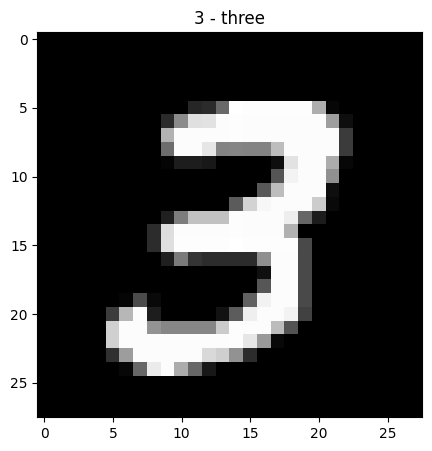

In [ ]:
import matplotlib.pyplot as plt
image, label=train_data[7]
fig=plt.figure(figsize=(5,5))
print(f"image shape:{image.shape}")
plt.imshow(image.squeeze(),cmap="gray")  # to squeeze to make data in form of matplotlib
plt.title(class_names[label])

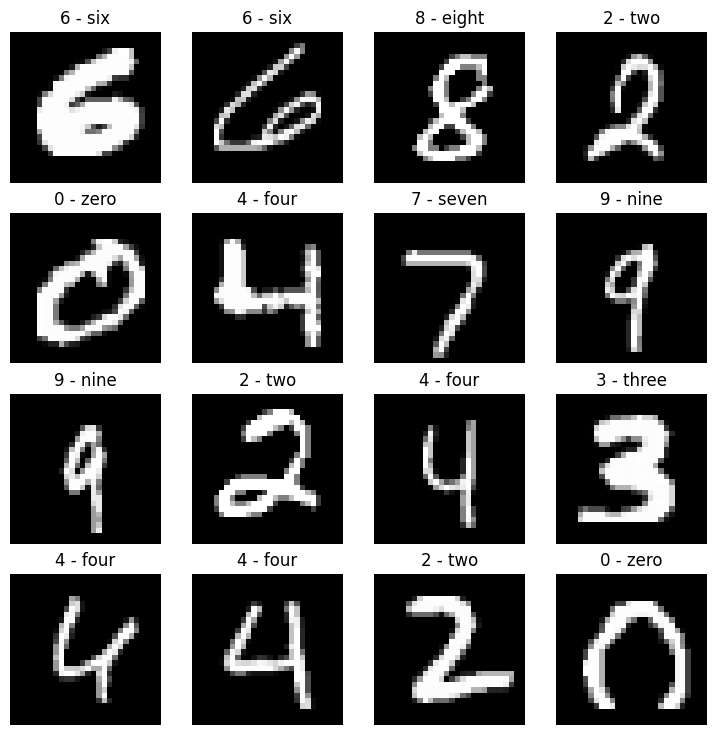

In [ ]:
# Plot more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()   # see above for explanation
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

#Prepare DataLoader

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=32
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle= True)
test_dataloader=DataLoader(test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)
print(f"Dataloaders:{train_dataloader, test_dataloader}")
print(f"length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7d28b501e590>, <torch.utils.data.dataloader.DataLoader object at 0x7d28b501d030>)
length of train dataloader:1875 batches of 32
length of test dataloader:313 batches of 32


#check out what is inside the training/test dataloader

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch= next(iter(test_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)
print(test_features_batch.shape, test_labels_batch.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])


### vizualaize a sample

image size:torch.Size([1, 28, 28])
label: 9, label size: torch.Size([])


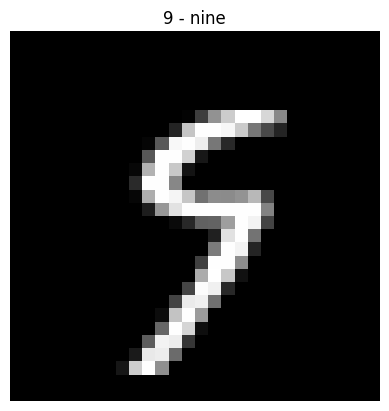

In [ ]:
torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
img, label= train_features_batch [random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")  # squeeze to remove extra single dimension
plt.title(class_names[label])
plt.axis("off")
print(f"image size:{img.shape}")
print(f"label: {label}, label size: {label.shape}")


#Creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
  total_time= end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

# Setup device agnostic-code

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Build a CNN model (TinyVGG)

https://poloclub.github.io/cnn-explainer/

In [ ]:
from torch.nn.modules.conv import Conv2d
class MNISTModel(nn.Module):

  """ model architecture that replicates the TinyVGG model from CNN explainer website"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
        #building first block (as our data are 2d, we use nn.Conv2d and  nn.MaxPool2d)
        nn.Conv2d(in_channels=input_shape,  # number of channels in visual data
                  out_channels= hidden_units,
                  kernel_size=3, # this is size of the filter; this could be a tupel (3,3)
                  stride=1, # default; Tiny VGG uses a stride of 1 for its convolutional layers
                  padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,    #  size of the window to take a max over
                     stride=2)   # default stride value is same as kernel_size
        )

    #building 2nd block
      self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.MaxPool2d(kernel_size=2, stride=2),

        )
    # next, flatten data and send them to a linear layer, as model1 (classifier)
      self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape) # number of classes =len(class_names)=10
    )

  def forward(self,x:torch.Tensor):
    x=self.conv_block_1(x)  # x goes to block1
    #print(f"outputshape of conv_block_1:{x.shape}")
    x=self.conv_block_2(x)   # goes to block2
    #print(f"outputshape of conv_block_2:{x.shape}")
    x=self.classifier(x)
    #print(f"outputshape of classifier:{x.shape}")
    return x

# instantiate the model
torch.manual_seed(42)
modelMNIST = MNISTModel(input_shape=1,  # number of chanles in our images. check: image.shape ===1
    hidden_units=10,
    output_shape=len(class_names)).to(device)
modelMNIST


MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
modelMNIST(image.unsqueeze(0).to(device))

tensor([[ 0.0407, -0.0243,  0.0283,  0.0011, -0.0440,  0.0060,  0.0481, -0.0673,
          0.0462, -0.0372]], grad_fn=<AddmmBackward0>)

In [ ]:
# check with a random tensor of same size as image to find the in_features in cassifier
rand_image_tensor =torch.randn(size=(1,28,28))
rand_image_tensor.shape
modelMNIST(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0276, -0.0354,  0.0448, -0.0097, -0.0473,  0.0209,  0.0434, -0.0504,
          0.0213, -0.0634]], grad_fn=<AddmmBackward0>)

# Setup accuracy, loss function and optimizer

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    # how many of y_true, y_pred are equal
    accuracy_fn = (correct / len(y_pred)) * 100     #  difinitation of accuracy

    return accuracy_fn

In [ ]:
# setup loss and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelMNIST.parameters(), lr=0.1)

#Training and testing



In [ ]:
# to create a function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device= device):
  # training
  train_loss, train_acc= 0, 0
  model.train()
  for batch, (X,y) in enumerate (data_loader):
    X,y= X.to(device), y.to(device) # send data to GPU
    y_pred=model(X)  # Forward pass
    loss= loss_fn(y_pred,y)
    acc= accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # raw output of model (y_pred) are logits. But accuracy_fn expects y_true and y_pred in the same format
    # if y_pred is logit, we take argmax to find the logit with highest index (prediction label)
    # we could also take softmax  to take prediction probabilities, but indeed no need, as we only need prediction label and argmax does it.
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()   # optimizer zero grad
    loss.backward()   # loss backwaard
    optimizer.step()   #optimizer step

  train_loss/= len(data_loader)
  train_acc /= len(data_loader)

#print(f"Train Loss:{train_loss:.5f}   |  Train accuracy:{train_acc:.2f}")
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device= device):


  # Testing
  test_loss, test_acc= 0,0
  # put model to eval mode
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y= X.to(device), y.to(device)  #data to GPU
      test_pred=model(X)  # Forward pass
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred= test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc/= len(data_loader)

    print(f"\nTrain Loss:{test_loss:.5f}  |  Test Acc: {test_acc:2f}")



In [ ]:
torch.manual_seed(42)
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs=3
for epoch in tqdm (range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  # call train/test functions
  train_step(model=modelMNIST,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn)
  test_step(model=modelMNIST,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn)
  train_time_end_on_gpu= timer()
  total_train_time_model= print_train_time(start= train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

NameError: ignored

In [ ]:
torch.manual_seed(42)
def eval_model (model: torch.nn.Module, # type of the model
               data_loader: torch.utils.data.DataLoader, # the type of dataloader
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):    # device-agnostic code for eval_model function
  """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
       #Send data to the target device
       X, y = X.to(device), y.to(device)
       y_pred= model(X)




       loss += loss_fn(y_pred, y)
       acc += accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim=1))


    loss/= len(data_loader)
    acc /= len(data_loader)

  return { "model_name": model.__class__.__name__,
          "model_loss": loss.item(),
           "model_acc": acc}



In [ ]:
import numpy as np
model_MNIST_results = eval_model(
    model= modelMNIST,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_MNIST_results

#Make and evaluate random predictions

In [ ]:
img, label= test_data[0]
img.shape


In [ ]:
def make_predictions (model: torch.nn.Module,
                      data: list,  # data will be a list
                      device: torch.device=device):
  pred_probs= [] # create an empty lsit for prediction probabilities
  model.eval()   # turn model to evaluation mode
  with torch.inference_mode():
    for sample in data:   # for each sample in data
      # prepare sample: add a batch dimension and pass it to device
      sample=torch.unsqueeze(sample, dim=0).to(device)   # it takes a single image. we unsqueeze because we need to add batch size dimension as 0 index. After adding extra dimension we send sample to device
      # forward pass (model output raw logits)
      pred_logit=model(sample)
      # get prediciton probability (logit->prediction probability)
      pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)  # squeeze to get rid of extra dimension
      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())   # matplotlip work with data on cpu

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[2].shape}\nTest sample label: {test_labels[2]} ({class_names[test_labels[2]]})")


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=modelMNIST,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]
# convert prediction probabilities to lables:
pred_classes= pred_probs.argmax(dim=1)   # as before in notebook2
pred_classes

In [ ]:
test_labels

In [ ]:
# plot predicitons
plt.figure(figsize=(9,9))
nrows=3 # number or rows
ncols=3  # number of comobs
for i, sample in enumerate (test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)
  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  # find the prediciton (in text form, e.g., "sandal")
  pred_label=class_names[pred_classes[i]]

  # get the truth label (in text form)
  truth_label=class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


In [ ]:
from google.colab import files

# Prompt the user to upload an image file
uploaded = files.upload()


In [ ]:
from google.colab import files
from PIL import Image
from io import BytesIO  # Add this import

# Prompt the user to upload an image file
uploaded = files.upload()

# Access the first uploaded image (assuming only one image is uploaded)
uploaded_images = list(uploaded.values())
uploaded_image = Image.open(BytesIO(uploaded_images[0]))

# Preprocess the uploaded image as needed
uploaded_image = uploaded_image.convert("L")
uploaded_image = uploaded_image.resize((28, 28))
uploaded_image = np.array(uploaded_image) / 255.0

# Create a PyTorch tensor from the image
uploaded_image_tensor = torch.tensor(uploaded_image, dtype=torch.float32)

# For MNIST, reshape the image to match the model's expected input shape (1, 28, 28)
uploaded_image_tensor = uploaded_image_tensor.unsqueeze(0).unsqueeze(0).to(device)

# Make predictions using your model
with torch.no_grad():
    prediction = modelMNIST(uploaded_image_tensor)

predicted_label = prediction.argmax().item()

print(f"Predicted Label: {predicted_label}")


#modelMNIST(image.unsqueeze(0).to(device))
